In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [125]:
df=pd.read_csv('C:/Users/swethabalaji/Downloads/insurance_claims.csv')

In [126]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [128]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['policy_bind_date']=df['policy_bind_date'].dt.year

In [129]:
df['incident_date']=pd.to_datetime(df['incident_date'])
df['incident_date']=df['incident_date'].dt.year

In [130]:
df.describe(include='object').T

,count,unique,top,freq
policy_state,1000,3,OH,352
policy_csl,1000,3,250/500,351
insured_sex,1000,2,FEMALE,537
insured_education_level,1000,7,JD,161
insured_occupation,1000,14,machine-op-inspct,93
insured_hobbies,1000,20,reading,64
insured_relationship,1000,6,own-child,183
incident_type,1000,4,Multi-vehicle Collision,419
collision_type,1000,4,Rear Collision,292
incident_severity,1000,4,Minor Damage,354


In [131]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [132]:
df=df.drop('_c39',axis=1)

In [133]:
df.policy_number.value_counts()

116735    1
107181    1
430794    1
115399    1
328387    1
824116    1
492224    1
663190    1
936638    1
193213    1
347984    1
674485    1
740019    1
326322    1
836272    1
651948    1
484200    1
182953    1
154280    1
793948    1
563878    1
150181    1
699044    1
246435    1
500384    1
924318    1
776860    1
873114    1
463513    1
125591    1
         ..
904191    1
544225    1
206213    1
873859    1
515457    1
658816    1
556415    1
343421    1
261905    1
804219    1
118137    1
521592    1
431478    1
290162    1
521585    1
853360    1
935277    1
439660    1
464234    1
154982    1
761189    1
218684    1
689500    1
398683    1
163161    1
218456    1
179538    1
357713    1
247116    1
296960    1
Name: policy_number, Length: 1000, dtype: int64

In [134]:
df.drop('policy_number',inplace=True,axis=1)

In [135]:
pd.crosstab(df['insured_sex'],df['fraud_reported'])

fraud_reported,N,Y
insured_sex,,
FEMALE,411,126
MALE,342,121


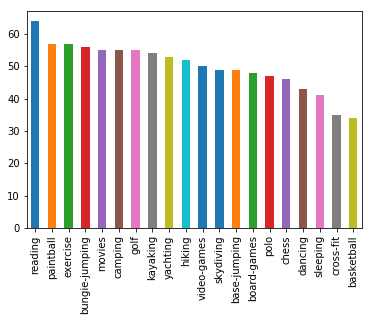

In [136]:
df['insured_hobbies'].value_counts().plot(kind='bar')

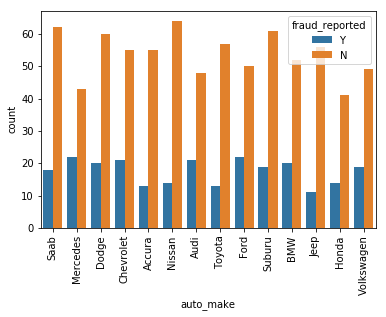

In [137]:
sns.countplot(x=df['auto_make'],hue=df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

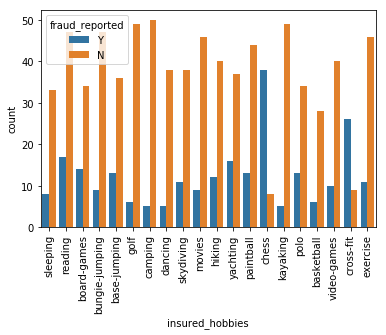

In [139]:
sns.countplot(x=df['insured_hobbies'],hue=df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()
#Those who were  fraudulent , maximum had chess as their hobby and those who exercised were more reliable

In [142]:
df.select_dtypes(include='object').columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'fraud_reported'],
      dtype='object')

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col]=le.fit_transform(df[col])

In [16]:
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2014,2,1,1000,1406.91,0,466132,1,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,2006,1,1,2000,1197.22,5000000,468176,1,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,2000,2,0,2000,1413.14,5000000,430632,0,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,1990,0,1,2000,1415.74,6000000,608117,0,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,2014,0,2,1000,1583.91,6000000,610706,1,...,1,1,6500,1300,650,4550,0,31,2009,0


In [17]:
df.corr()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,-0.048276,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,...,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,-0.037444,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,...,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_bind_date,-0.048276,-0.037444,1.000000,-0.007276,-0.016466,-0.049598,0.001249,0.048008,-0.001100,-0.032891,...,0.055907,-0.007129,-0.000146,0.002529,-0.000970,-0.000610,-0.004779,0.026988,0.015164,-0.000059
policy_state,-0.000328,-0.014533,-0.007276,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,...,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,-0.016466,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,...,0.071500,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,-0.049598,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,...,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.001249,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,...,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.048008,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,...,-0.006738,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,-0.001100,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,...,0.019805,-0.017607,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368
insured_sex,0.060925,0.073337,-0.032891,-0.020481,-0.010757,-0.009733,0.038853,0.010688,-0.036942,1.000000,...,0.042463,0.020864,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873


In [18]:
X=df.drop('fraud_reported',axis=1)
Y=df['fraud_reported']

In [19]:
X

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,2014,2,1,1000,1406.91,0,466132,1,...,1,2,2,71610,6510,13020,52080,10,1,2004
1,228,42,2006,1,1,2000,1197.22,5000000,468176,1,...,0,0,0,5070,780,780,3510,8,12,2007
2,134,29,2000,2,0,2000,1413.14,5000000,430632,0,...,2,3,1,34650,7700,3850,23100,4,30,2007
3,256,41,1990,0,1,2000,1415.74,6000000,608117,0,...,1,2,1,63400,6340,6340,50720,3,34,2014
4,228,44,2014,0,2,1000,1583.91,6000000,610706,1,...,0,1,1,6500,1300,650,4550,0,31,2009
5,256,39,2006,2,1,1000,1351.10,0,478456,0,...,0,2,1,64100,6410,6410,51280,10,3,2003
6,137,34,2000,1,1,1000,1333.35,0,441716,1,...,0,0,0,78650,21450,7150,50050,9,29,2012
7,165,37,1990,0,0,1000,1137.03,0,603195,1,...,2,2,2,51590,9380,9380,32830,1,5,2015
8,27,33,1997,0,0,500,1442.99,0,601734,0,...,1,1,2,27700,2770,2770,22160,12,9,2012
9,212,42,2011,0,0,500,1315.68,0,600983,1,...,2,1,0,42300,4700,4700,32900,10,1,1996


In [20]:
Y.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=0)

print (xtrain.shape,ytrain.shape)
print (xtest.shape,ytest.shape)

(700, 37) (700,)
(300, 37) (300,)


In [22]:
modelscore=[]

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logr = LogisticRegression()
logr.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
ypred=logr.predict(xtest)

In [25]:
print(logr.score(xtrain, ytrain)) #trainscore

0.7571428571428571


In [26]:
lr_score=metrics.accuracy_score(ytest, ypred)
print(lr_score) #testscore

0.74


In [27]:
print(metrics.confusion_matrix(ytest,ypred))

[[222   1]
 [ 77   0]]


In [28]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       223
           1       0.00      0.00      0.00        77

   micro avg       0.74      0.74      0.74       300
   macro avg       0.37      0.50      0.43       300
weighted avg       0.55      0.74      0.63       300



2) KNN Model

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [31]:
ypredk=knn.predict(xtest)

In [32]:
print(knn.score(xtrain, ytrain)) #trainscore

0.7785714285714286


In [33]:
knn_score=metrics.accuracy_score(ytest, ypredk)
print(knn_score) #testscore

0.7066666666666667


In [34]:
print(metrics.confusion_matrix(ytest,ypredk))

[[201  22]
 [ 66  11]]


In [35]:
print(metrics.classification_report(ytest,ypredk))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       223
           1       0.33      0.14      0.20        77

   micro avg       0.71      0.71      0.71       300
   macro avg       0.54      0.52      0.51       300
weighted avg       0.65      0.71      0.66       300



In [36]:
modelscore.append(['Knn',knn_score])

In [37]:
modelscore.append(['Logistic Regression',lr_score])

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
param1={'n_neighbors':np.arange(1,10),'weights':['uniform','distance'],'metric':['minkowski','euclidean']}
GS1=GridSearchCV(knn,param1,cv=3,scoring='roc_auc')
GS1.fit(X,Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'weights': ['uniform', 'distance'], 'metric': ['minkowski', 'euclidean']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [40]:
GS1.best_params_

{'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'uniform'}

In [41]:
knn_reg=KNeighborsClassifier(n_neighbors=9,weights='distance',metric='minkowski')
knn_reg.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='distance')

In [42]:
ypredk1=knn_reg.predict(xtest)

In [43]:
print(knn_reg.score(xtrain, ytrain)) #trainscore

1.0


In [44]:
knn_reg_score=metrics.accuracy_score(ytest, ypredk1)
print(knn_reg_score) #testscore

0.7233333333333334


In [45]:
modelscore.append(['Knn_Reg',knn_reg_score])

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
ypreddt=dtc.predict(xtest)

In [48]:
print(dtc.score(xtrain,ytrain)) #trainscore

1.0


In [49]:
dtc_score=metrics.accuracy_score(ytest, ypreddt)
print(dtc_score) #testscore

0.81


In [50]:
print(metrics.confusion_matrix(ytest,ypreddt))

[[201  22]
 [ 35  42]]


In [51]:
print(metrics.classification_report(ytest,ypreddt))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       223
           1       0.66      0.55      0.60        77

   micro avg       0.81      0.81      0.81       300
   macro avg       0.75      0.72      0.74       300
weighted avg       0.80      0.81      0.80       300



In [52]:
modelscore.append(['DT',dtc_score])

In [53]:
param2={'max_depth':np.arange(1,20),'criterion':['gini','entropy']}
GS2=GridSearchCV(dtc,param2,cv=3,scoring='roc_auc')
GS2.fit(X,Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [54]:
GS2.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [58]:
dtc_reg=DecisionTreeClassifier(max_depth=3,criterion='entropy')
dtc_reg.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
ypreddt1=dtc_reg.predict(xtest)

In [60]:
print(dtc_reg.score(xtrain,ytrain)) #trainscore

0.8657142857142858


In [61]:
dtc_reg_score=metrics.accuracy_score(ytest, ypreddt1)
print(dtc_reg_score) #testscore

0.8566666666666667


In [62]:
print(metrics.confusion_matrix(ytest,ypreddt1))

[[204  19]
 [ 24  53]]


In [63]:
print(metrics.classification_report(ytest,ypreddt1))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       223
           1       0.74      0.69      0.71        77

   micro avg       0.86      0.86      0.86       300
   macro avg       0.82      0.80      0.81       300
weighted avg       0.85      0.86      0.86       300



In [64]:
modelscore.append(['DT_Reg',dtc_reg_score])

In [65]:
modelscore

[['Knn', 0.7066666666666667],
 ['Logistic Regression', 0.74],
 ['Knn_Reg', 0.7233333333333334],
 ['DT', 0.81],
 ['DT_Reg', 0.8566666666666667]]

In [66]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()

In [67]:
gb.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [68]:
ypredg=gb.predict(xtest)

In [69]:
gnb_score=metrics.accuracy_score(ytest, ypredg)
print(gnb_score) #testscore

0.68


In [70]:
print(metrics.confusion_matrix(ytest,ypredg))

[[181  42]
 [ 54  23]]


In [100]:
modelscore.append(['GaussianNB',gnb_score])


In [101]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(xtrain, ytrain)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [102]:
ypredb=bnb.predict(xtest)

In [103]:
print(bnb.score(xtrain,ytrain)) #trainscore

0.8157142857142857


In [104]:
bnb_score=metrics.accuracy_score(ytest, ypredb)
print(bnb_score) #testscore

0.82


In [105]:
print(metrics.confusion_matrix(ytest,ypredb))

[[197  26]
 [ 28  49]]


In [106]:
print(metrics.classification_report(ytest,ypredb))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       223
           1       0.65      0.64      0.64        77

   micro avg       0.82      0.82      0.82       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.82      0.82      0.82       300



In [107]:
modelscore.append(['BernoulliNB',bnb_score])

In [108]:
modelscore

[['Knn', 0.7066666666666667],
 ['Logistic Regression', 0.74],
 ['Knn_Reg', 0.7233333333333334],
 ['DT', 0.81],
 ['DT_Reg', 0.8566666666666667],
 ['GaussianNB', 0.68],
 ['BernoulliNB', 0.82]]

In [109]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [110]:
ypreds=svc.predict(xtest)

In [111]:
print(svc.score(xtrain,ytrain)) #trainscore

1.0


In [112]:
svc_score=metrics.accuracy_score(ytest, ypreds)
print(svc_score) #testscore

0.7433333333333333


In [113]:
print(metrics.classification_report(ytest,ypreds))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       223
           1       0.00      0.00      0.00        77

   micro avg       0.74      0.74      0.74       300
   macro avg       0.37      0.50      0.43       300
weighted avg       0.55      0.74      0.63       300



In [114]:
modelscore.append(['SVC',svc_score])

In [115]:
modelscore

[['Knn', 0.7066666666666667],
 ['Logistic Regression', 0.74],
 ['Knn_Reg', 0.7233333333333334],
 ['DT', 0.81],
 ['DT_Reg', 0.8566666666666667],
 ['GaussianNB', 0.68],
 ['BernoulliNB', 0.82],
 ['SVC', 0.7433333333333333]]

In [116]:
scores = pd.DataFrame(modelscore, columns =['Name', 'Score']) 
scores

,Name,Score
0,Knn,0.706667
1,Logistic Regression,0.740000
2,Knn_Reg,0.723333
3,DT,0.810000
4,DT_Reg,0.856667
5,GaussianNB,0.680000
6,BernoulliNB,0.820000
7,SVC,0.743333


In [118]:
scores.sort_values(by=['Score'], inplace=True)

In [120]:
scores.set_index('Name',inplace=True)

In [121]:
scores

,Score
Name,
GaussianNB,0.680000
Knn,0.706667
Knn_Reg,0.723333
Logistic Regression,0.740000
SVC,0.743333
DT,0.810000
BernoulliNB,0.820000
DT_Reg,0.856667
